# Read and Visualize SMAP L1B


"This Level-1B (L1B) product provides calibrated estimates of time-ordered geolocated brightness temperatures measured by the Soil Moisture Active Passive (SMAP) passive microwave radiometer. SMAP L-band brightness temperatures are referenced to the Earth's surface with undesired and erroneous radiometric sources removed"


The data can be downloaded here:

https://search.earthdata.nasa.gov/search


------------------------
DTR


# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import h5py

In [4]:
import cartopy

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
import cartopy.io.img_tiles as cimgt

In [7]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [8]:
import os

# Working Directory

In [9]:
#os.getcwd()

## Data

In [10]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/SMAP/L1B'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/SMAP/L1B'

In [11]:
os.listdir(dir_data)

['SMAP_L1B_TB_46557_D_20231019T224644_R18290_001.h5',
 'SMAP_L1B_TB_46563_A_20231020T074815_R18290_001.h5',
 'SMAP_L1B_TB_46559_D_20231020T020339_R18290_001.h5']

list the files

In [12]:
lst_Files = [fl for fl in os.listdir(dir_data) if fl.endswith('.h5') ]
lst_Files

['SMAP_L1B_TB_46557_D_20231019T224644_R18290_001.h5',
 'SMAP_L1B_TB_46563_A_20231020T074815_R18290_001.h5',
 'SMAP_L1B_TB_46559_D_20231020T020339_R18290_001.h5']

In [13]:
os.path.join(dir_data, lst_Files[0] )

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/SMAP/L1B/SMAP_L1B_TB_46557_D_20231019T224644_R18290_001.h5'

# File size and memory checks

In [14]:
def convert_bytes(byt_num):
    """
    this function will convert bytes to KB, MB, GB, TB and PB
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB', 'PB']:
        if byt_num < 1024.0:
            return "%3.1f %s" % (byt_num, x)
        byt_num /= 1024.0
    
        

In [15]:
def check_filesize(file_path):
    """
    function to check the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)

In [16]:
#file size
check_filesize(os.path.join(dir_data, lst_Files[0] ))

'47.5 MB'

# Explore the dataset



In [17]:
FILE_NAME = os.path.join(dir_data, lst_Files[0] )
FILE_NAME

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/SMAP/L1B/SMAP_L1B_TB_46557_D_20231019T224644_R18290_001.h5'

Data groups in the HDF5 file ?

In [18]:
with h5py.File(FILE_NAME, mode='r') as f:
    print('Data Groups in HDF5 file:')
    for key in f.keys():
        print('- ', key) #Names of the groups in HDF5 file.
        


Data Groups in HDF5 file:
-  Brightness_Temperature
-  Calibration_Data
-  HighResolution_Calibration_Data
-  Metadata
-  Spacecraft_Data


Let's explore the "Brightness_Temperature" data Group

In [19]:

dat_grp = 'Brightness_Temperature'


with h5py.File(FILE_NAME, mode='r') as f:
    
    print('Exploring the data group: ', dat_grp)
    #Get the HDF5 group
    group = f[dat_grp]

    #Checkout what keys are inside that group.
    print('What is inside the ', dat_grp, ' group: ')
    print('************************************************* \n')
    for key in group.keys():
        print(key)
        

Exploring the data group:  Brightness_Temperature
What is inside the  Brightness_Temperature  group: 
************************************************* 

antenna_earth_azimuth
antenna_look_angle
antenna_scan_angle
antenna_sidelobe_correction_3
antenna_sidelobe_correction_4
antenna_sidelobe_correction_h
antenna_sidelobe_correction_v
atm_correction_h
atm_correction_v
atm_loss
earth_boresight_azimuth
earth_boresight_incidence
faraday_rotation_angle
faraday_rotation_correction_h
faraday_rotation_correction_v
footprint_surface_status
galactic_direct_correction_h
galactic_direct_correction_v
galactic_reflected_correction_3
galactic_reflected_correction_4
galactic_reflected_correction_h
galactic_reflected_correction_v
lunar_direct_phi
lunar_direct_theta
lunar_specular_correction_3
lunar_specular_correction_4
lunar_specular_correction_h
lunar_specular_correction_v
lunar_specular_lat
lunar_specular_lon
lunar_specular_phi
lunar_specular_reflection_coefficient_h
lunar_specular_reflection_coeffici

# Read the data

Let's read and visualise the "tb_h" data, which Horizontally polarized brightness temperature at the land surface after RFI filtering'

In [20]:

name_data = '/Brightness_Temperature/tb_h'

with h5py.File(FILE_NAME, mode='r') as f:
    
    data = f[name_data][:]
    units = f[name_data].attrs['units']
    longname = f[name_data].attrs['long_name']
    _FillValue = f[name_data].attrs['_FillValue']
    valid_max = f[name_data].attrs['valid_max']
    valid_min = f[name_data].attrs['valid_min']        
    invalid = np.logical_or(data > valid_max,
                        data < valid_min)
    invalid = np.logical_or(invalid, data == _FillValue)
    data[invalid] = np.nan
    data = np.ma.masked_where(np.isnan(data), data)

    # Get the geolocation data
    latitude = f['/Brightness_Temperature/tb_lat'][:]
    longitude = f['/Brightness_Temperature/tb_lon'][:]

        
print('... completed reading: ', longname)

... completed reading:  b'Horizontally polarized brightness temperature at the surface after RFI filtering'


In [21]:
units

b'Kelvin'

In [22]:
units=str(units,'utf-8')
print(units)

Kelvin


In [23]:
_FillValue

-9999.0

In [24]:
data.shape

(778, 241)

In [25]:
latitude.shape

(778, 241)

In [26]:
longitude.shape

(778, 241)

minimum values

In [27]:
latitude.min()

-9999.0

In [28]:
data.min()

69.55276

### quickview

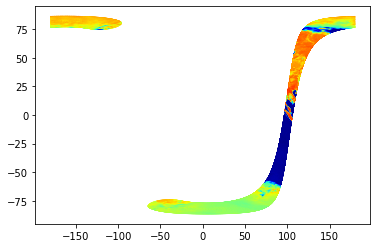

In [29]:
plt.scatter(longitude, latitude, c=data, s=1, cmap=plt.cm.jet,
            edgecolors=None, linewidth=0)

# Plot using Basemap

In [30]:
from mpl_toolkits.basemap import Basemap

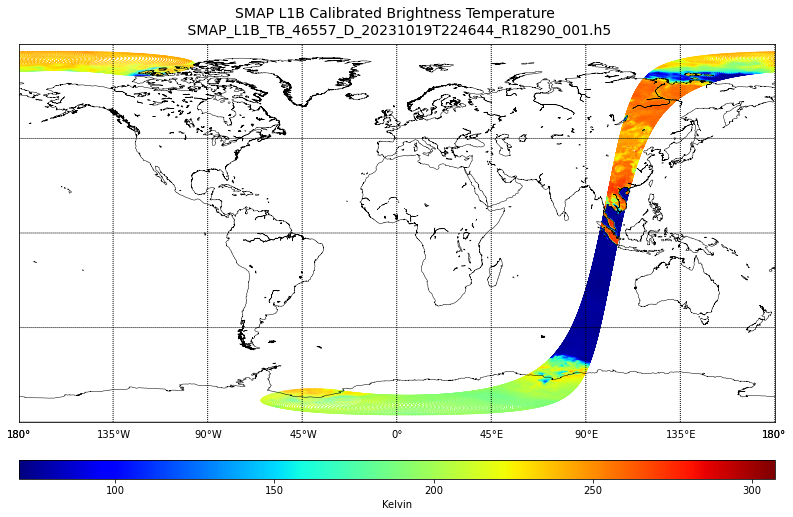

In [31]:
plt.figure(figsize=(14,8))

m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180)

m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
m.scatter(longitude, latitude, c=data, s=1, cmap=plt.cm.jet,
        edgecolors=None, linewidth=0)
cb = m.colorbar(location="bottom", pad='10%')    
cb.set_label(units)

fle_nem = os.path.basename(FILE_NAME)

plt.title('SMAP L1B Calibrated Brightness Temperature \n {}'.format(fle_nem),
          fontsize = 14,
          y=1.01)

plt.show()


# Plot using Cartopy

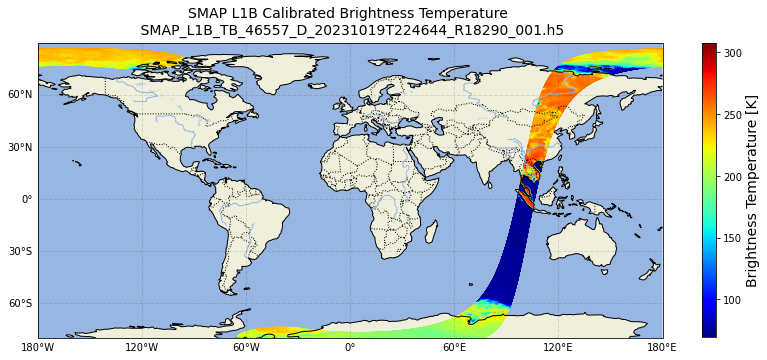

In [32]:
fig = plt.figure()
fig.set_size_inches(14, 12)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-180, 180, -80, 90], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
### add background
#ax.add_image(stamen_terrain, 8)
### add data
pl = ax.scatter(longitude, latitude, c=data, s=1,cmap=plt.cm.jet )
##
#plt.colorbar().set_title('',fontsize=8)

#cb = ax.colorbar(location="bottom", pad='10%')    
#cb.set_label(units)


#img = ax.imshow(image_file)
cb = plt.colorbar(pl, ax=ax, shrink=0.45 )
cb.set_label("Brightness Temperature [K]", fontsize=14 )



##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

###
fle_nem = os.path.basename(FILE_NAME)
ax.set_title('SMAP L1B Calibrated Brightness Temperature \n {}'.format(fle_nem),
             fontsize = 14,
             y=1.01)


plt.show()